In [13]:
import SimpleModel as sm
import numpy as np
import matplotlib.pyplot as plt
import os
import astropy.units as u
import astropy.constants as const
import pdb

%matplotlib inline

In [14]:
n = 10000

dMass_planet = np.random.uniform(0.5,10,n)
dPresXUV = np.random.uniform(0.1,10,n)
dAtmGasConst = np.random.uniform(3600,4157,n)
dThermTemp = np.random.uniform(880,3000,n)
dFXUV = np.random.uniform(43,172,n)
AtmMassFrac = np.random.uniform(0.01,0.1,n)
dAtmXAbsEffH = np.random.uniform(0.1,0.6,n)
sPlanetRadiusModel = "lehmer"
dSatXUVtime = np.random.uniform(80e6,120e6,n)

In [16]:
data = sm.planet_over_time((2*const.M_earth).value, #total mass of planet
                    (0.1*u.AU).value, # semi
                    880, # temp
                    (1.94*const.M_earth).value, #mass of core
                    0, # density (not needed)
                    4157, # gas const
                    (1*const.M_sun).value,
                    0.1) # mass of sun
data[-1]

KeyboardInterrupt: 

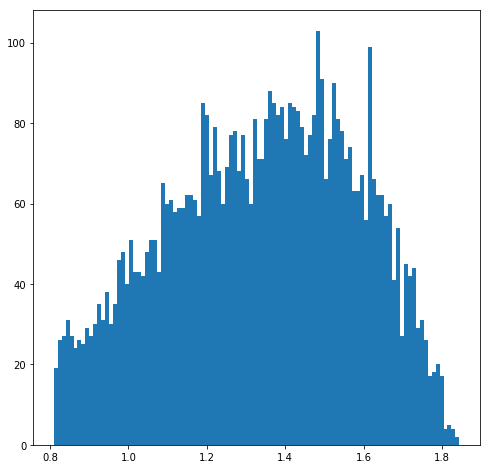

In [8]:
RadSolid_list = np.array([])
for (MassPlanet,T,alpha,Rg) in zip(dMass_planet,dThermTemp, AtmMassFrac, dAtmGasConst):
    EnvMass = MassPlanet * alpha
    core_mass = ((MassPlanet - EnvMass)*const.M_earth).value
    data = sm.planet_over_time((MassPlanet*const.M_earth).value,
                               (0.1*u.AU).value,
                               T,
                               core_mass,
                               0,
                               Rg,
                               (1*const.M_sun).value,
                               eta
                                  )
    if data[1][-1] == 0.0: #envelope lost
        
        RadSolid = data[-1]*u.m
        RadSolid = (RadSolid.to(u.earthRad)).value
        RadSolid_list = np.append(RadSolid_list, RadSolid)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,8)

ax.hist(RadSolid_list, bins=102);
mean = np.mean(RadSolid_list)
    

In [ ]:
dMass_planet 

In [9]:
mean

1.3332148319223338

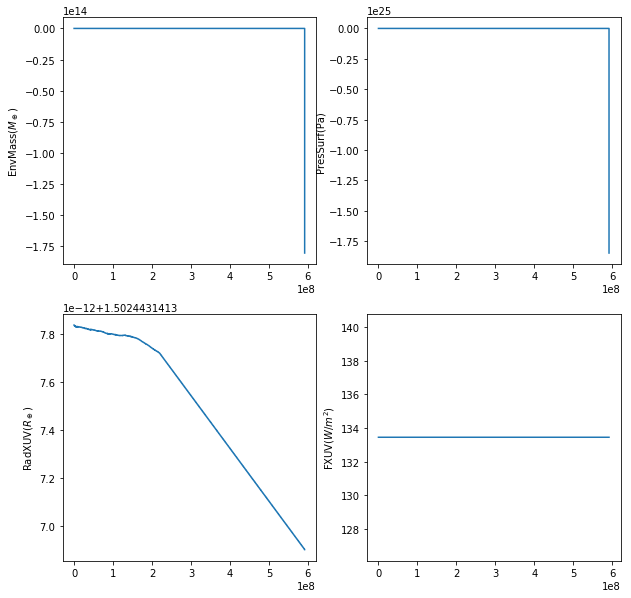

In [21]:
def FourPanelPlot(comp_runs_dir, folder_num):
    # functionto plot EnvMass, RadXUV, PresSurf, Fxuv
    fig,ax = plt.subplots(2,2)
    fig.set_size_inches(10,10)
    EnvMass_list = np.array([])
    RadXUV_list = np.array([])
    PresSurf_list = np.array([])
    FXUV_list = np.array([])
    time_list = np.array([])
    fwd_file = open(comp_runs_dir + folder_num + '/atm.b.forward')
    fwd_content = fwd_file.read()
    fwd_content = fwd_content.split('\n')[:-1]
    for line in fwd_content:
        line = line.split(' ')
        EnvMass = float(line[2])
        EnvMass_list = np.append(EnvMass_list, EnvMass)
        RadXUV = float(line[5])
        RadXUV_list = np.append(RadXUV_list, RadXUV)
        PresSurf= float(line[6])
        PresSurf_list = np.append(PresSurf_list, PresSurf)
        FXUV = float(line[7])
        FXUV_list = np.append(FXUV_list, FXUV)
        time = float(line[0])
        time_list = np.append(time_list, time)
    ax[0,0].plot(time_list, EnvMass_list)
    ax[0,0].set(ylabel='EnvMass($M_\oplus$)')
    ax[0,1].plot(time_list, PresSurf_list)
    ax[0,1].set(ylabel='PresSurf(Pa)')
    ax[1,0].plot(time_list, RadXUV_list)
    ax[1,0].set(ylabel='RadXUV($R_\oplus$)')
    ax[1,1].plot(time_list, FXUV_list)
    ax[1,1].set(ylabel='FXUV($W/m^2$)')


comp_runs_dir = './lehmer_reprod_comp/'
FourPanelPlot(comp_runs_dir, '00003')